# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Processing

Read data and process image paths

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Aygaz Nöronlarıı/labels.csv') # Reading the label file
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
data.shape

(10222, 2)

In [7]:
def read_and_resize_image_rgb(file_path):
    img = cv2.imread(file_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb_resized = cv2.resize(img_rgb, (224, 224))
    return img_rgb_resized

In [8]:
image_dir = '/kaggle/input/dog-breed-identification/train'

In [9]:
data['breed'].nunique()

120

In [10]:
data['filepath'] = 'Aygaz-nöronlarıı/train/' + data['id'] + '.jpg' # Paths for images
data.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,Aygaz-nöronlarıı/train/000bec180eb18c7604dcecc...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,Aygaz-nöronlarıı/train/001513dfcb2ffafc82cccf4...
2,001cdf01b096e06d78e9e5112d419397,pekinese,Aygaz-nöronlarıı/train/001cdf01b096e06d78e9e51...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,Aygaz-nöronlarıı/train/00214f311d5d2247d5dfe4f...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,Aygaz-nöronlarıı/train/0021f9ceb3235effd7fcde7...


Resize Images

In [11]:
train = pd.read_csv("/kaggle/input/game-of-deep-learning-ship-datasets/train/train.csv")

FileNotFoundError: ignored

Turn labels into numerical values

In [12]:
Breeds = data['breed']
le = LabelEncoder()
data['breed'] = le.fit_transform(data['breed'])
data.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,19,Aygaz-nöronlarıı/train/000bec180eb18c7604dcecc...
1,001513dfcb2ffafc82cccf4d8bbaba97,37,Aygaz-nöronlarıı/train/001513dfcb2ffafc82cccf4...
2,001cdf01b096e06d78e9e5112d419397,85,Aygaz-nöronlarıı/train/001cdf01b096e06d78e9e51...
3,00214f311d5d2247d5dfe4fe24b2303d,15,Aygaz-nöronlarıı/train/00214f311d5d2247d5dfe4f...
4,0021f9ceb3235effd7fcde7f7538ed62,49,Aygaz-nöronlarıı/train/0021f9ceb3235effd7fcde7...


Show First 20 İmages

NameError: ignored

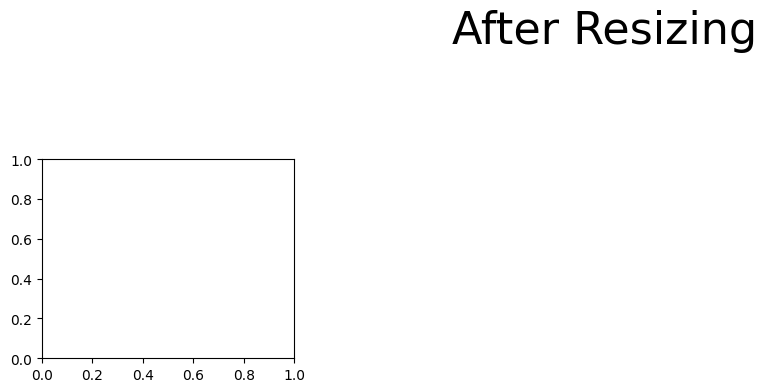

In [13]:
#From C-NN Ship Classification
nrow = 5
ncol = 4
fig1 = plt.figure(figsize=(15, 15))
fig1.suptitle('After Resizing', size=32)
for i in range(20):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(resized_image_list[i])
    plt.title('Label = {x}, Ship is {y}'.format(x=data["breed"][i], y=Breeds['breed'][i]))
    plt.axis('Off')
    plt.grid(False)
plt.show()

Data augmentation

In [ ]:
#From C-NN Ship Classification
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])
augmented_images = data_augmentation(resized_image_list)

Show Augmented Images

In [ ]:
#From C-NN Ship Classification
fig2 = plt.figure(figsize=(15, 15))
fig2.suptitle('After Augmentation', size=32)
for i in range(20):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(augmented_images[i])
    plt.title('Label = {x}, Breed is {y}'.format(x=data["breed"][i], y=Breeds["breed"][i]))
    plt.axis('Off')
    plt.grid(False)
plt.show()

#Train Test Data Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(resized_image_list, data['breed'],random_state=30) # Böylemi olmalı emin değilim
print(X_train.shape, y_train.shape)

# Building a Model


In [ ]:
#Model Fitting
model=tf.keras.Sequential()